<a href="https://colab.research.google.com/github/mmk32001/New-Repository/blob/master/Fake_News_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

---



In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

### **Load Dataset**

---



In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
print(fake.shape)
print(true.shape)

(23481, 4)
(21417, 4)


### **Data Preprocessing**

---



In [4]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [5]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [6]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [7]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [8]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [9]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [10]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [11]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
data.head()

,title,text,subject,date,target
0,HILLARY LIES AGAIN…She’s NOT The First Female ...,"What a role model for women and young girls, a...",left-news,"Jun 9, 2016",fake
1,HILARIOUS! FOX News’ Greg Gutfeld Introduces N...,At the start of the Fox News Greg Gutfeld Show...,left-news,"May 20, 2017",fake
2,Hadi calls on Yemenis to rise up against Houth...,DUBAI (Reuters) - Yemeni President Abd-Rabbu M...,worldnews,"December 4, 2017",true
3,Some lawmakers talk gun control after Florida ...,WASHINGTON (Reuters) - The deadliest mass shoo...,politicsNews,"June 12, 2016",true
4,Why Did CNN Doctor Killer’s Photo To Disguise ...,The cover-ups and mistruths appear to be numer...,left-news,"Oct 4, 2015",fake


In [13]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,HILLARY LIES AGAIN…She’s NOT The First Female ...,"What a role model for women and young girls, a...",left-news,fake
1,HILARIOUS! FOX News’ Greg Gutfeld Introduces N...,At the start of the Fox News Greg Gutfeld Show...,left-news,fake
2,Hadi calls on Yemenis to rise up against Houth...,DUBAI (Reuters) - Yemeni President Abd-Rabbu M...,worldnews,true
3,Some lawmakers talk gun control after Florida ...,WASHINGTON (Reuters) - The deadliest mass shoo...,politicsNews,true
4,Why Did CNN Doctor Killer’s Photo To Disguise ...,The cover-ups and mistruths appear to be numer...,left-news,fake


In [14]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"What a role model for women and young girls, a...",left-news,fake
1,At the start of the Fox News Greg Gutfeld Show...,left-news,fake
2,DUBAI (Reuters) - Yemeni President Abd-Rabbu M...,worldnews,true
3,WASHINGTON (Reuters) - The deadliest mass shoo...,politicsNews,true
4,The cover-ups and mistruths appear to be numer...,left-news,fake


In [15]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"what a role model for women and young girls, a...",left-news,fake
1,at the start of the fox news greg gutfeld show...,left-news,fake
2,dubai (reuters) - yemeni president abd-rabbu m...,worldnews,true
3,washington (reuters) - the deadliest mass shoo...,politicsNews,true
4,the cover-ups and mistruths appear to be numer...,left-news,fake


In [16]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [17]:
data.head()

,text,subject,target
0,what a role model for women and young girls a ...,left-news,fake
1,at the start of the fox news greg gutfeld show...,left-news,fake
2,dubai reuters yemeni president abdrabbu manso...,worldnews,true
3,washington reuters the deadliest mass shootin...,politicsNews,true
4,the coverups and mistruths appear to be numero...,left-news,fake


In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmk32\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
data.head()

,text,subject,target
0,role model women young girls presidential cand...,left-news,fake
1,start fox news greg gutfeld show gutfeld showe...,left-news,fake
2,dubai reuters yemeni president abdrabbu mansou...,worldnews,true
3,washington reuters deadliest mass shooting us ...,politicsNews,true
4,coverups mistruths appear numerous question am...,left-news,fake


In [20]:
data.tail()

,text,subject,target
44893,president trump deputy assistant sebastian gor...,left-news,fake
44894,paris reuters french finance minister bruno le...,worldnews,true
44895,tucker carlson weighed hysteria gun control bl...,politics,fake
44896,admission donald trump screwed answer msnbc to...,News,fake
44897,tripoli reuters islamic state militants libya ...,worldnews,true


In [21]:
def remove_numbers(text):
    clean_str = re.sub('[^a-zA-Z]',' ',text)
    return clean_str


data['text'] = data['text'].apply(remove_numbers)

In [22]:
data.tail()

,text,subject,target
44893,president trump deputy assistant sebastian gor...,left-news,fake
44894,paris reuters french finance minister bruno le...,worldnews,true
44895,tucker carlson weighed hysteria gun control bl...,politics,fake
44896,admission donald trump screwed answer msnbc to...,News,fake
44897,tripoli reuters islamic state militants libya ...,worldnews,true


### **Data Visualisation**

---



subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


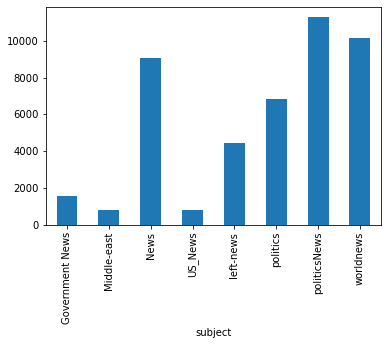

In [23]:
# How many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


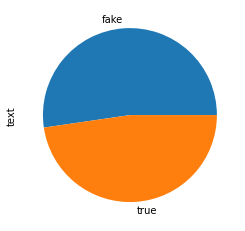

In [24]:
# How many fake and real articles?

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="pie")
plt.show()

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


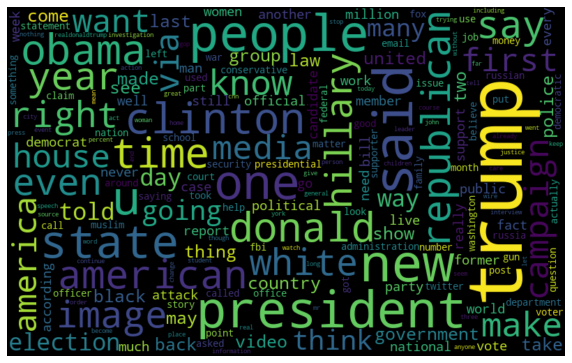

In [26]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

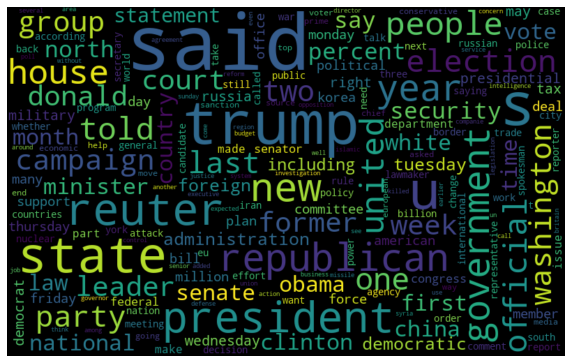

In [27]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

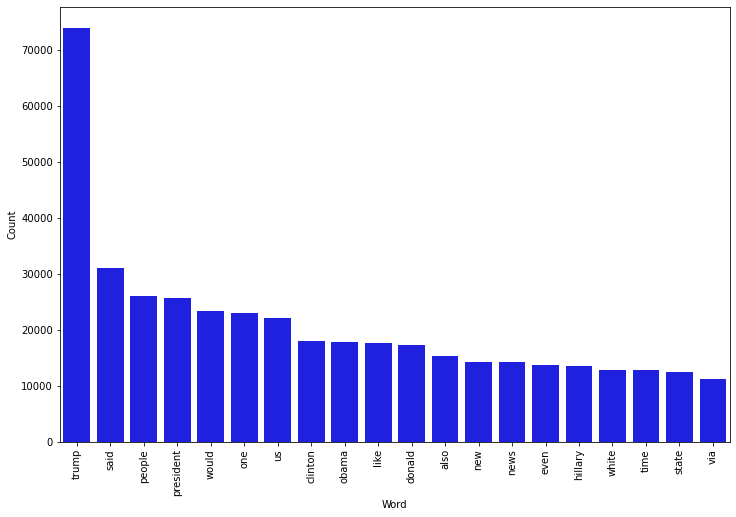

In [29]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

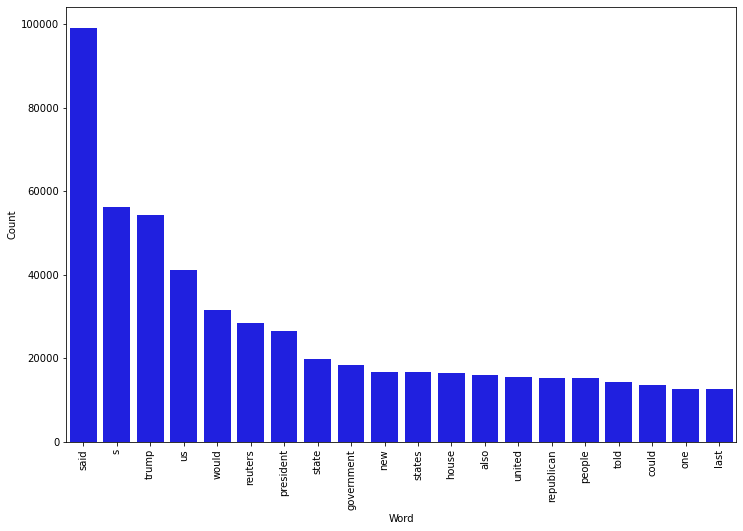

In [30]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [31]:
data['target'].unique()

array(['fake', 'true'], dtype=object)

In [32]:
# Encoding true=1 and fake=0
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
data['target']= label_encoder.fit_transform(data['target'])
 
data['target'].unique()

array([0, 1])

In [33]:
targets=data.target
targets.head()

0    0
1    0
2    1
3    1
4    0
Name: target, dtype: int32

In [34]:
data['target'].unique()

array([0, 1])

In [35]:
print(data['target'])

0        0
1        0
2        1
3        1
4        0
        ..
44893    0
44894    1
44895    0
44896    0
44897    1
Name: target, Length: 44898, dtype: int32


### **Splitting Dataset**

---



In [36]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(data['text'], targets, test_size=0.4, random_state=7)

In [37]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [38]:
# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

### **Logistic Regression**

---



In [39]:
Logistic_model= LogisticRegression()

In [40]:
Logistic_model.fit(tfidf_train,y_train)    

LogisticRegression()

In [41]:
Logistic_predict = Logistic_model.predict(tfidf_test)
testing_data_accuracy = accuracy_score(Logistic_predict, y_test)
print("Logistic Regression Accuracy: {}%".format(round(testing_data_accuracy*100,2)))

Logistic Regression Accuracy: 98.15%


<ipython-input-42-4ab52f82fe62>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

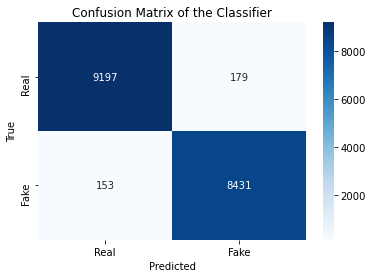

In [42]:
cm = confusion_matrix(y_test,Logistic_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

### **SVM**

---



In [43]:
svm_model=svm.SVC(kernel="linear")
svm_model.fit(tfidf_train,y_train)


SVC(kernel='linear')

In [44]:
svm_predict=svm_model.predict(tfidf_test)


In [45]:
print("SVM(Linear) Accuracy: {}%".format(round(accuracy_score(y_test, svm_predict)*100,2)))

SVM(Linear) Accuracy: 99.23%


<ipython-input-46-8a36128b2b9b>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

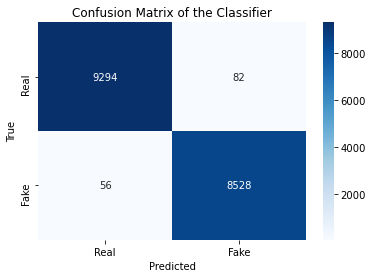

In [46]:
cm = confusion_matrix(y_test,svm_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

### **Passive Aggressive Classifier**

---



In [47]:
# Initialize a PassiveAggressiveClassifier

pac_model=PassiveAggressiveClassifier(max_iter=50)
pac_model.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [48]:
# Predict on the test set and calculate accuracy

pac_predict=pac_model.predict(tfidf_test)
score=accuracy_score(y_test,pac_predict)
print(f'Passive Aggressive Classifier Accuracy: {round(score*100,2)}%')

Passive Aggressive Classifier Accuracy: 99.29%


In [49]:
#Build confusion matrix
cm = confusion_matrix(y_test,pac_predict, labels=[0,1])

<ipython-input-50-69ee4d6ff0e4>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

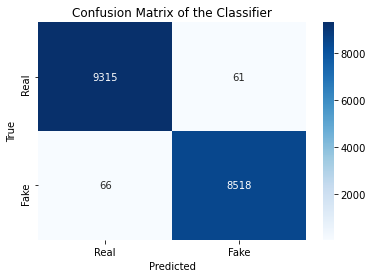

In [50]:
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

### **Decision Tree Classifier**

---



In [51]:

# Vectorizing and applying TF-IDF
pipe =DecisionTreeClassifier(criterion= 'entropy',random_state=42)
# Fitting the model
dtc_model = pipe.fit(tfidf_train, y_train)

# Accuracy
dtc_predict = dtc_model.predict(tfidf_test)
print("Decision Tree Classifier Accuracy: {}%".format(round(accuracy_score(y_test, dtc_predict)*100,2)))

Decision Tree Classifier Accuracy: 99.51%


<ipython-input-52-e8db3cdc9128>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

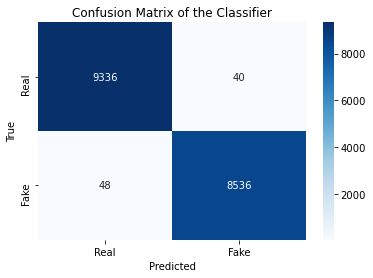

In [52]:
cm = confusion_matrix(y_test, dtc_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

### **Random Forest Classifier**

---



In [53]:
rfc_model=RandomForestClassifier()
rfc_model.fit(tfidf_train,y_train)

RandomForestClassifier()

In [54]:
rfc_predict = rfc_model.predict(tfidf_test)
print("Random Forest Classifier Accuracy: {}%".format(round(accuracy_score(y_test, rfc_predict)*100,2)))

Random Forest Classifier Accuracy: 98.59%


<ipython-input-55-ca870ea569be>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

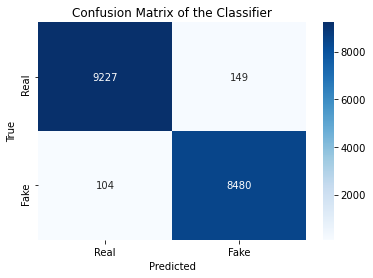

In [55]:
cm = confusion_matrix(y_test, rfc_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

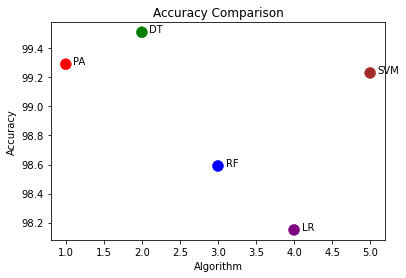

In [56]:

left = [1, 2, 3, 4, 5]
annotations=['PA', 'DT', 'RF','LR','SVM']
height = [round(score*100,2), round(accuracy_score(y_test, dtc_predict)*100,2), round(accuracy_score(y_test, rfc_predict)*100,2),round(accuracy_score(y_test, Logistic_predict)*100,2),round(accuracy_score(y_test, svm_predict)*100,2)]
plt.scatter(left, height, color = ['red', 'green','blue','purple','brown'],linewidths = 0.5, s=120)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
for i, label in enumerate(annotations):
    plt.annotate(label, (left[i]+0.1, height[i]))
 
plt.show()

### **Take Input**

---



In [57]:
print(y_test)

25168    0
5096     1
3123     1
37809    1
27507    1
        ..
9603     0
42809    1
820      1
37697    0
23394    0
Name: target, Length: 17960, dtype: int32


In [58]:
i=int(input())
X_new = tfidf_test[i]
prediction = dtc_model.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

3
[1]
The news is Real
